In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [14]:
#Importamos los datos

fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


# Exploramos los datos

In [15]:
fashion_mnist.train.labels.shape

(55000, 10)

In [16]:
fashion_mnist.train.num_examples

55000

In [17]:
fashion_mnist.test.num_examples

10000

In [18]:
single_img = fashion_mnist.train.images[0].reshape(28,28)

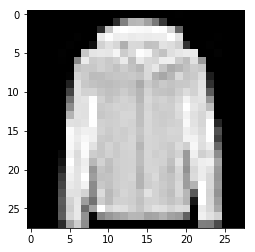

In [19]:
plt.imshow(single_img, cmap="gist_gray")

# Placeholder

In [9]:
x = tf.placeholder(tf.float32, shape=[None, 784])
z_true = tf.placeholder(tf.float32,[None, 10])

# Variables

In [10]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Operaciones

In [11]:
z = tf.matmul(x,W) + b 

# Loss function

In [12]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=z_true, logits=z))

# Optimizador

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

# Modelo

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = fashion_mnist.train.next_batch(55)
        
        sess.run(train, feed_dict={x:batch_x, z_true:batch_y})
        
    correct_prediction = tf.equal(tf.argmax(z,1), tf.argmax(z_true, 1))
    
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(acc,feed_dict={x:fashion_mnist.test.images, z_true:fashion_mnist.test.labels}))

0.8305
